# Project 2 Report

## Electricity Consumption Mapping Across Edinburgh

 ### 1. Introduction

 This project analyzes postcode-level electricity consumption in Edinburgh. In other words, the aim is to understand how electricity consumption varies across different areas of Edinburgh. Using geospatial methods, we transform postcode data into geographical area zones and create a map to visualize spatial variations in electricity usage. This way, we could reveal any identifiable spatial clusters of high or low consumption, compare different postcodes and find the areas that exhibit the highest electricity demand.




### 2. Dataset Description

The main dataset we used in this project is "Postcode_level_all_meters_electricity_2023.csv" which includes all numerical features which are: 'Postcode',	'Num_meters', 'Total_cons_kwh', 'Mean_cons_kwh', 'Median_cons_kwh'. 


In [ ]:
import pandas as pd

# read file
main_dataset = pd.read_csv('./Postcode_level_all_meters_electricity_2023.csv')

# print first 5 rows
main_dataset.head()

,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh
0,AB10,All postcodes,13009,3.453549e+07,2654.738390,1923.300
1,AB10,AB10 1AU,34,7.607384e+04,2237.465794,1466.706
2,AB10,AB10 1BA,30,1.364550e+05,4548.500000,2248.550
3,AB10,AB10 1DQ,7,6.086280e+04,8694.685714,9552.800
4,AB10,AB10 1FG,25,4.762189e+04,1904.875800,1415.400


In [ ]:
# show types and non-null counts
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291008 entries, 0 to 1291007
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Outcode          1291008 non-null  object 
 1   Postcode         1291008 non-null  object 
 2   Num_meters       1291008 non-null  int64  
 3   Total_cons_kwh   1291008 non-null  float64
 4   Mean_cons_kwh    1291008 non-null  float64
 5   Median_cons_kwh  1291008 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 59.1+ MB


In [ ]:
# show statistical values of the dataset 
main_dataset.describe()

,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh
count,1.291008e+06,1.291008e+06,1.291008e+06,1.291008e+06
mean,4.409340e+01,1.475413e+05,3.519404e+03,2.911168e+03
std,5.951905e+02,1.962898e+06,1.664251e+03,1.357643e+03
min,5.000000e+00,7.014000e+02,1.169000e+02,1.128000e+02
25%,1.000000e+01,3.403818e+04,2.538174e+03,2.122100e+03
50%,1.800000e+01,5.904146e+04,3.136766e+03,2.635050e+03
75%,3.000000e+01,9.675465e+04,4.005315e+03,3.308850e+03
max,7.023700e+04,2.240349e+08,6.838562e+04,6.981275e+04


### 3. Exploratory Data Analysis

In the exploratory data analysis section of our project, we aimed to visualize some graphs to understand the structure of the data better. This helped us to see how we can model the data. 

### 3. Designing the Algorithm
What is the end goal?
- To find the electricity consumption activities across Ediburgh.

What should the results look like?
- A map of Edinburgh that shows different electricity consumption levels in different colors. 

What data do we have?
- Postcodes for each area in Scotland, rate of electricity consumption for each postcode area, the total area of the region.

What should the rough structure of the algorithm should be?
- We will need to create a map with geopandas. We’ll need to find a way to pick different colours to draw each cluster of points.





### 4. Implementation of the Code

In [ ]:
# Import the libraries needed.

import geopandas as gpd
import mapclassify
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Upload and read the dataset.

main_dataset = pd.read_csv("C:/Users/LENOVO/Downloads/Postcode_level_all_meters_electricity_2023.csv")

In [ ]:
# Classify the regions as one of the [Urban Areas, New Towns, Industrial, Rural, Mixed Rural] classes.

# From google map
region_outcode = {
    'Abbey': ['EH8'], 
    'Inverness Millburn': ['IV2'], 
    'Linn': ['G44', 'G45'], 
    'Livingston North': ['EH54'], 
    'Livingston South': ['EH54'], 
    'Loch a Tuath': ['HS2', 'HS3'], 
    'Lochar': ['DG1'], 
    'Lochee': ['DD2'], 
    'Lochgelly and Cardenden': ['KY5', 'KY4'], 
    'Lomond': ['G83'], 
    'Lomond North': ['G83', 'FK8'], 
    'Lower Braes': ['FK1', 'FK2'], 
    'Lower Deeside': ['AB1', 'AB15'], 
    'Maryfield': ['DD4'], 
    'Maryhill / Kelvin': ['G20', 'G12', 'G13'], 
    'Maybole, North Carrick and Coylton': ['KA19'], 
    'Meadows / Morningside': ['EH9', 'EH10'], 
    'Mearns': ['AB32', 'AB33'], 
    'Mid and Upper Nithsdale': ['DG4', 'DG7'], 
    'Mid Argyll': ['PA31', 'PA32', 'PA33']
}

# From google map
region_classification = {
    # Urban Areas
    'Abbey': 'Urban',
    'Linn': 'Urban',
    'Maryhill / Kelvin': 'Urban',
    'Maryfield': 'Urban',
    'Lochee': 'Urban',
    'Meadows / Morningside': 'Urban',
    
    # New Towns
    'Livingston North': 'New_Town',
    'Livingston South': 'New_Town',
    
    # Industrial
    'Lochgelly and Cardenden': 'Industrial',
    
    # Rural
    'Inverness Millburn': 'Rural',
    'Loch a Tuath': 'Rural',
    'Lomond': 'Rural',
    'Lomond North': 'Rural',
    'Mid Argyll': 'Rural',
    
    # Mixed Rural
    'Lochar': 'Mixed_Rural',
    'Lower Braes': 'Mixed_Rural',
    'Lower Deeside': 'Mixed_Rural',
    'Maybole, North Carrick and Coylton': 'Mixed_Rural',
    'Mearns': 'Mixed_Rural',
    'Mid and Upper Nithsdale': 'Mixed_Rural'
}

In [36]:
# Add the new 'Region' and 'Classification' columns into the main dataset and call it 'region_dataset'.

for key, values in region_outcode.items():
    for outcode in values:
        main_dataset.loc[main_dataset['Outcode'] == outcode, 'Region'] = key

for key, value in region_classification.items():
    main_dataset.loc[main_dataset['Region'] == key, 'Classification'] = value

region_dataset = main_dataset.dropna()
region_dataset.head()

,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Region,Classification
1690,AB15,All postcodes,18748,6.296387e+07,3358.431392,2609.05,Lower Deeside,Mixed_Rural
1691,AB15,AB15 4AA,28,9.967927e+04,3559.973821,2867.50,Lower Deeside,Mixed_Rural
1692,AB15,AB15 4AB,23,6.778836e+04,2947.320087,2728.40,Lower Deeside,Mixed_Rural
1693,AB15,AB15 4AD,26,9.257594e+04,3560.612962,3203.70,Lower Deeside,Mixed_Rural
1694,AB15,AB15 4AE,17,8.197212e+04,4821.889647,4325.70,Lower Deeside,Mixed_Rural


In [ ]:
region_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 1690 to 849705
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Outcode          14626 non-null  object 
 1   Postcode         14626 non-null  object 
 2   Num_meters       14626 non-null  int64  
 3   Total_cons_kwh   14626 non-null  float64
 4   Mean_cons_kwh    14626 non-null  float64
 5   Median_cons_kwh  14626 non-null  float64
 6   Region           14626 non-null  object 
 7   Classification   14626 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
# Read the data zone dataset which was provided in 'Data Zone Boundaries'.
mapdata = gpd.read_file("C:/Users/LENOVO/Desktop/python2/SG_DataZone_Bdry_2022.shp")

In [26]:
mapdata.head()

,dzcode,dzname,totpop2022,hhres2022,hhcnt2022,stdareaha,stdareakm2,st_area_sh,st_length_,geometry
0,S01013482,Culter - 01,969.0,952.0,491.0,441.20,4.411924,4.411924e+06,11484.402180,"POLYGON ((383385 800703, 383385.411 800699.959..."
1,S01013483,Culter - 02,758.0,758.0,366.0,36.66,0.366708,3.649505e+05,3620.066386,"POLYGON ((383304.495 801654.205, 383391.947 80..."
2,S01013484,Culter - 03,542.0,542.0,292.0,25.57,0.255700,2.556998e+05,3135.203108,"POLYGON ((383473 801227, 383597 801087, 383598..."
3,S01013485,Culter - 04,560.0,560.0,270.0,9.62,0.096254,9.625426e+04,1647.461389,"POLYGON ((383976.659 801182.579, 383984.102 80..."
4,S01013486,Culter - 05,621.0,588.0,297.0,18.02,0.180077,1.800766e+05,3026.111412,"POLYGON ((384339 801211, 384316.51 801182.159,..."


<Axes: >

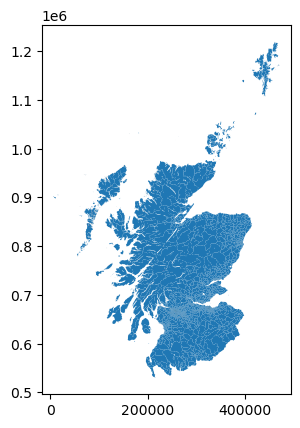

In [ ]:
# Plot the data in a map.

mapdata.plot()

Now we have to look at the 'Scottish Statistics Postcode Lookup' data for both `Postcode` and `DataZone2022Code` to merge those seperate informations into one merged data. 

In [29]:
lookup = pd.read_csv("C:/Users/LENOVO/Desktop/python2/SingleRecord.csv")

In [31]:
lookup.head()

,Postcode,PostcodeDistrict,PostcodeSector,SplitIndicator,LinkedSmallUserPostcode,DateOfIntroduction,DateOfDeletion,PostcodeType,GridReferenceEasting,GridReferenceNorthing,...,ITL2025Level3Code,CensusHouseholdCount2022,CensusPopulationCount2022,CensusHouseholdCount2011,CensusPopulationCount2011,CensusHouseholdCount2001,CensusPopulationCount2001,CensusHouseholdCount1991,CensusPopulationCount1991,ScottishIndexOfMultipleDeprivation2020Rank
0,AB1 1LE,AB1,AB1 1,N,NaN,01/08/1973,01/04/1996,S,393669,806650,...,TLM50,NaN,NaN,NaN,NaN,NaN,NaN,17.0,24.0,3506
1,AB1 4WJ,AB1,AB1 4,N,NaN,01/09/1990,01/04/1996,S,394549,801520,...,TLM50,NaN,NaN,NaN,NaN,NaN,NaN,27.0,60.0,6069
2,AB1 4QQ,AB1,AB1 4,N,NaN,01/08/1973,01/04/1996,S,392659,797060,...,TLM50,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,5810
3,AB1 5RZ,AB1,AB1 5,N,NaN,01/10/1977,01/04/1996,S,393089,802220,...,TLM50,NaN,NaN,NaN,NaN,NaN,NaN,10.0,28.0,4528
4,AB11 5TP,AB11,AB11 5,N,AB11 5BL,01/04/1996,12/07/1996,L,394290,806210,...,TLM50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3265


In [32]:
postcode_zone_lookup = lookup[['Postcode', 'DataZone2022Code']]

In [33]:
postcode_zone_lookup.head()

,Postcode,DataZone2022Code
0,AB1 1LE,S01013629
1,AB1 4WJ,S01013603
2,AB1 4QQ,S01013855
3,AB1 5RZ,S01013593
4,AB11 5TP,S01013567


In [34]:
# Control if there are any dublicates in the Data Zone code.

df = pd.DataFrame(postcode_zone_lookup)
flag = df.DataZone2022Code.duplicated()
flag.any()

np.True_

In [35]:
# Merge two datasets into one called 'electricity_lookup'.

electricity_lookup = postcode_zone_lookup.merge(region_dataset, left_on='Postcode', right_on='Postcode', how='left')
electricity_lookup = electricity_lookup.dropna()
electricity_lookup.head()

,Postcode,DataZone2022Code,Outcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Region,Classification
19,AB15 8TF,S01013716,AB15,24.0,123894.068,5162.252833,4191.55,Lower Deeside,Mixed_Rural
30,AB15 7TJ,S01013514,AB15,8.0,19669.400,2458.675000,2418.55,Lower Deeside,Mixed_Rural
40,AB15 8GX,S01013494,AB15,45.0,119403.200,2653.404444,2416.90,Lower Deeside,Mixed_Rural
47,AB15 5JH,S01013541,AB15,14.0,78273.800,5590.985714,4724.65,Lower Deeside,Mixed_Rural
49,AB15 8DG,S01013717,AB15,40.0,122609.700,3065.242500,2368.20,Lower Deeside,Mixed_Rural


This code groups the `electricity_lookup` table by `DataZone2022Code` and creates a summary table that contains, for each zone, the total number of meters, total electricity consumption, and the corresponding `Region` and `Classification` values.


In [37]:
zone_electricity = electricity_lookup.groupby('DataZone2022Code').agg({'Num_meters': 'sum', 'Total_cons_kwh': 'sum', 'Region': 'max', 'Classification': 'max'})
#zone_electricity['Mean_cons_kwh'] = zone_electricity['Total_cons_kwh'] / zone_electricity['Num_meters']
zone_electricity.head()

,Num_meters,Total_cons_kwh,Region,Classification
DataZone2022Code,,,,
S01013492,45.0,346662.200,Lower Deeside,Mixed_Rural
S01013493,300.0,992181.872,Lower Deeside,Mixed_Rural
S01013494,269.0,664891.459,Lower Deeside,Mixed_Rural
S01013495,288.0,1446344.062,Lower Deeside,Mixed_Rural
S01013496,253.0,1080007.280,Lower Deeside,Mixed_Rural


This code merges the geographic map data with the zone-level electricity summary, filters out unmatched areas, and keeps only the region, classification, geometry, total consumption, and meter count to prepare the final dataset for mapping.

In [38]:
map_merged = mapdata.merge(zone_electricity, left_on='dzcode', right_on='DataZone2022Code', how='left')
region_map_merged = map_merged.dropna()
region_map_merged = region_map_merged[['Region', 'Classification', 'geometry', 'Total_cons_kwh', 'Num_meters']]
region_map_merged.head()

,Region,Classification,geometry,Total_cons_kwh,Num_meters
6,Lower Deeside,Mixed_Rural,"POLYGON ((386917 802673, 386892 802530, 386927...",346662.200,45.0
11,Lower Deeside,Mixed_Rural,"POLYGON ((391575.411 803885.285, 391576.847 80...",777836.439,249.0
12,Lower Deeside,Mixed_Rural,"POLYGON ((383981.182 806104.601, 383973.868 80...",992181.872,300.0
13,Lower Deeside,Mixed_Rural,"POLYGON ((387004.066 805359.176, 387032.663 80...",664891.459,269.0
14,Lower Deeside,Mixed_Rural,"POLYGON ((390259.94 803747.159, 390312.192 803...",1446344.062,288.0


This code combines all zones inside each Region, adds up their total consumption and meters, and then calculates the average electricity use per meter for each Region.

In [39]:
city_electricity = region_map_merged.dissolve(by="Region", aggfunc={"Classification": "first", "Total_cons_kwh": "sum", "Num_meters": "sum"}).reset_index()
city_electricity['Mean_cons_kwh'] = city_electricity['Total_cons_kwh'] / city_electricity['Num_meters']
city_electricity

,Region,geometry,Classification,Total_cons_kwh,Num_meters,Mean_cons_kwh
0,Abbey,"POLYGON ((326411 672420, 326401.07 672419.338,...",Urban,3.320449e+07,12099.0,2744.399771
1,Inverness Millburn,"MULTIPOLYGON (((251609.02 816817.61, 251604.06...",Rural,9.241471e+07,26862.0,3440.350897
2,Linn,"POLYGON ((257622 657787, 257607 657729, 257649...",Urban,5.403451e+07,20671.0,2614.024795
3,Livingston South,"MULTIPOLYGON (((301332.76 657868.93, 301341.39...",New_Town,7.367055e+07,24509.0,3005.856970
4,Loch a Tuath,"MULTIPOLYGON (((98145.996 882434.495, 98154.00...",Rural,4.255502e+07,9229.0,4611.010760
5,Lochar,"MULTIPOLYGON (((298688.45 571130.24, 298685.82...",Mixed_Rural,4.275108e+07,13486.0,3170.034260
6,Lochee,"POLYGON ((335271.28 730088.74, 335269.23 73010...",Urban,6.937642e+07,22279.0,3113.982771
7,Lochgelly and Cardenden,"MULTIPOLYGON (((315899 686286, 315853 686222, ...",Industrial,5.719556e+07,20308.0,2816.405591
8,Lomond North,"MULTIPOLYGON (((236208.06 685152.42, 236207.44...",Rural,6.967824e+07,21605.0,3225.097831
9,Lower Braes,"MULTIPOLYGON (((288753.497 669359.997, 288762....",Mixed_Rural,1.148015e+08,37852.0,3032.904129


<Axes: >

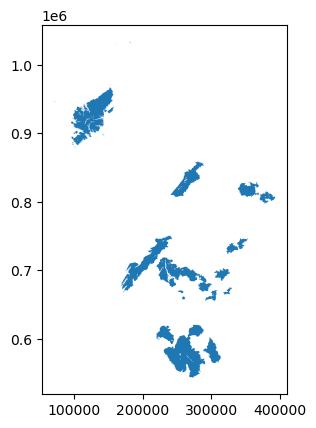

In [40]:
# Plot the average electricity usage among postcodes into a map.

city_electricity.plot()

THe code below plots a graph of those 20 regions we chose in the beginning and gives them different colors according to their classification based on the locations.

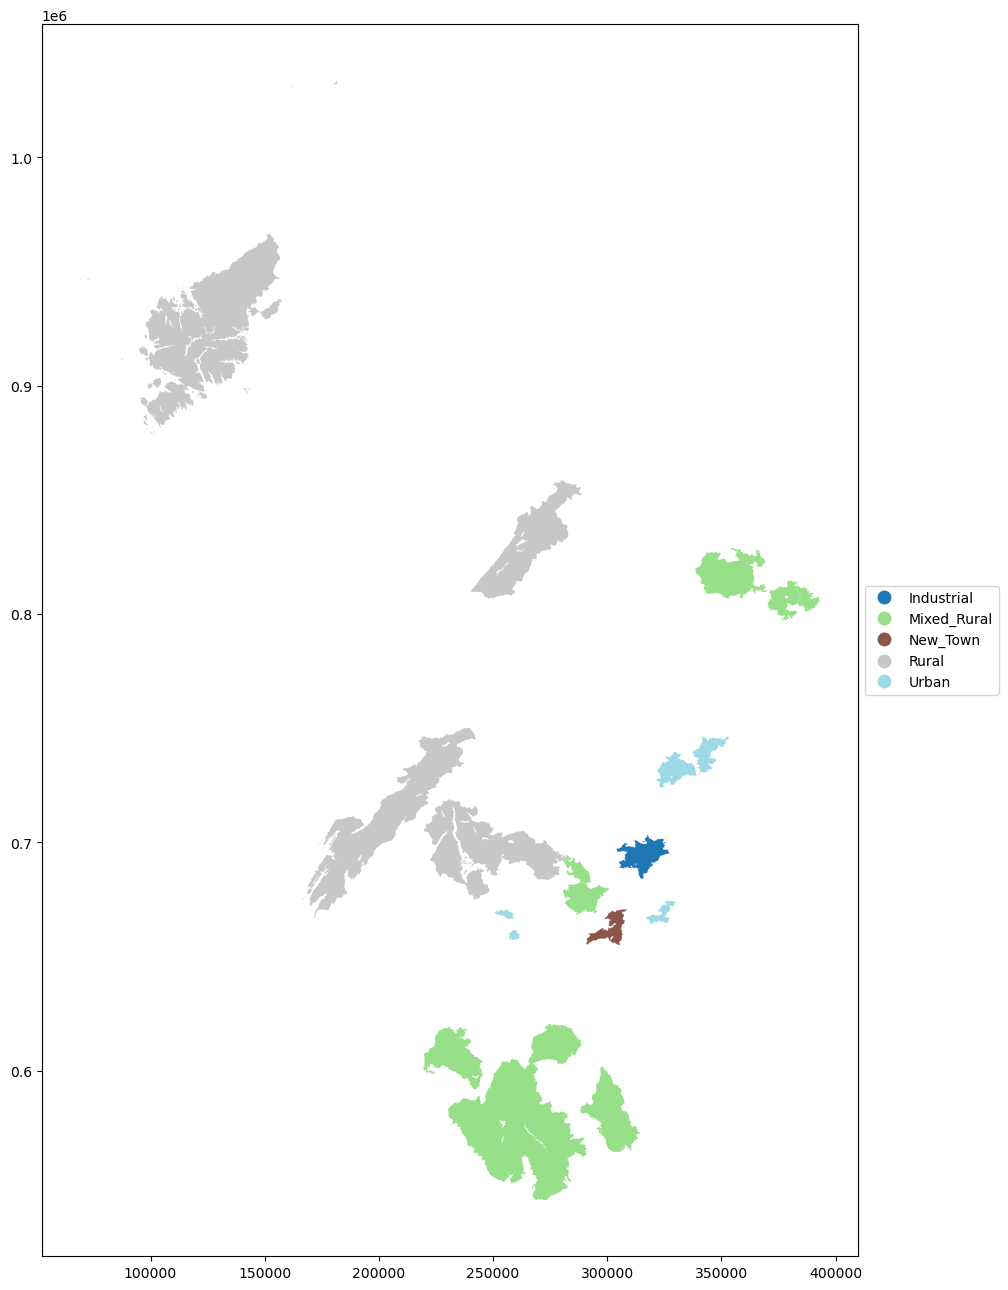

In [41]:
ax = city_electricity.plot(
    figsize = (20, 16),
    column = 'Classification',
    categorical = True,
    legend = True,
    cmap = 'tab20',
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
)


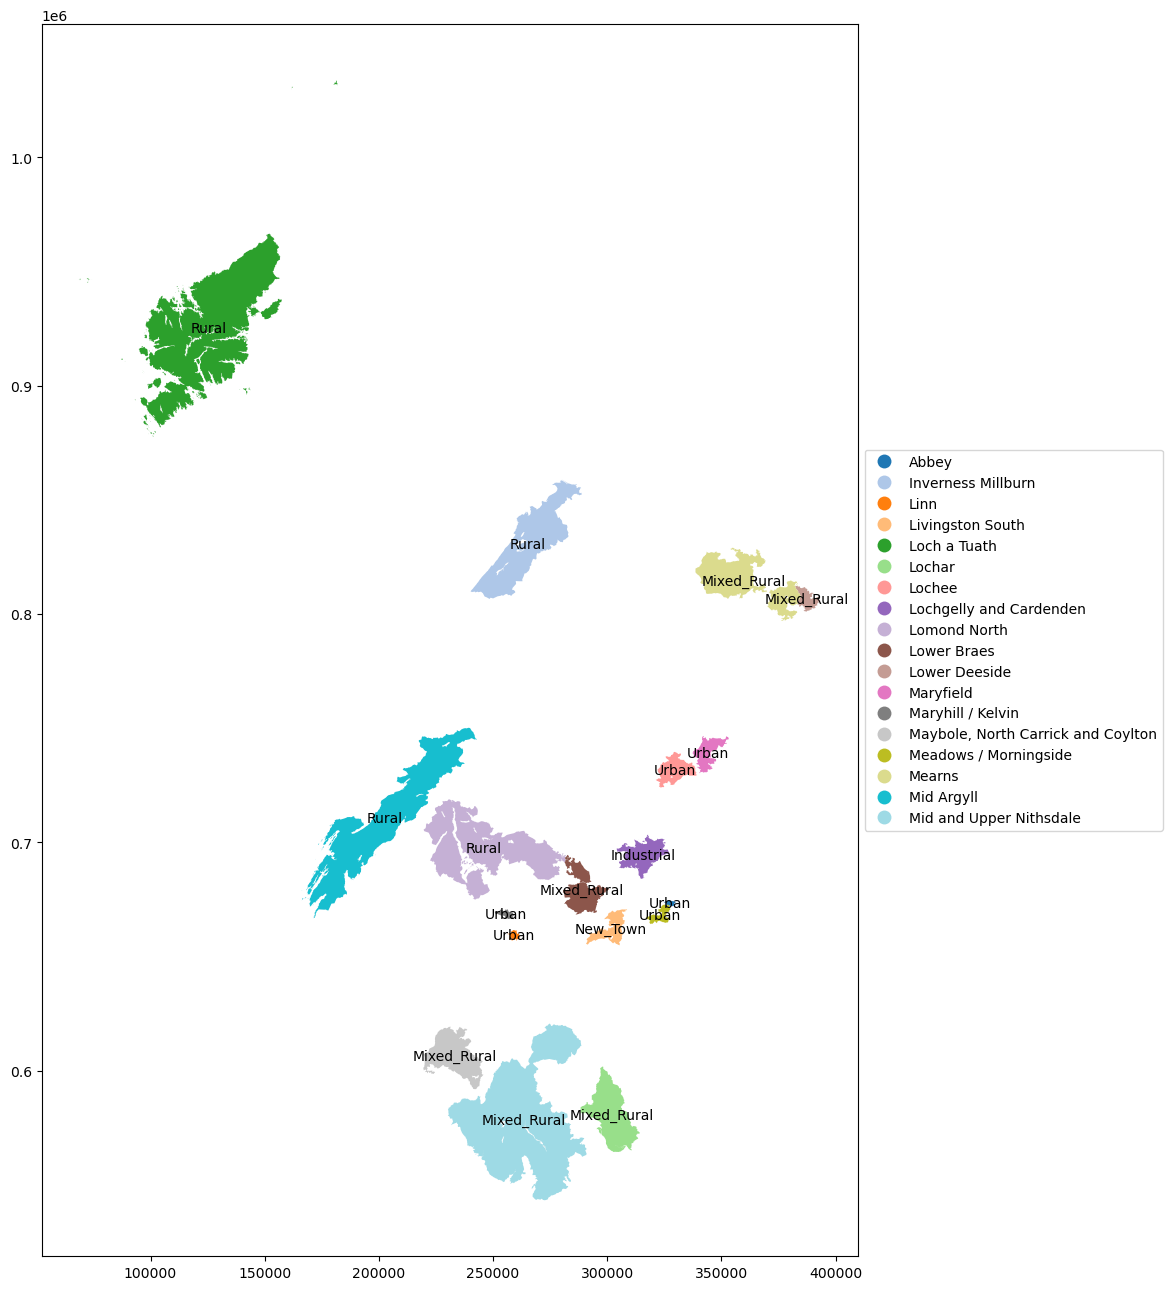

In [42]:
# Adds the names of the regions and give them each a different color on a legend. 

ax = city_electricity.plot(
    figsize = (20, 16),
    column = 'Region',
    categorical = True,
    legend = True,
    cmap = 'tab20',
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
)

for index in city_electricity.index:
    x = city_electricity.iloc[index].geometry.centroid.x
    y = city_electricity.iloc[index].geometry.centroid.y
    name = city_electricity.iloc[index]['Classification']
    ax.text(x, y, name, ha = 'center', va = 'center', color = 'black')


And the final map!

The map shows each region in a different color based on their electricity consumption.

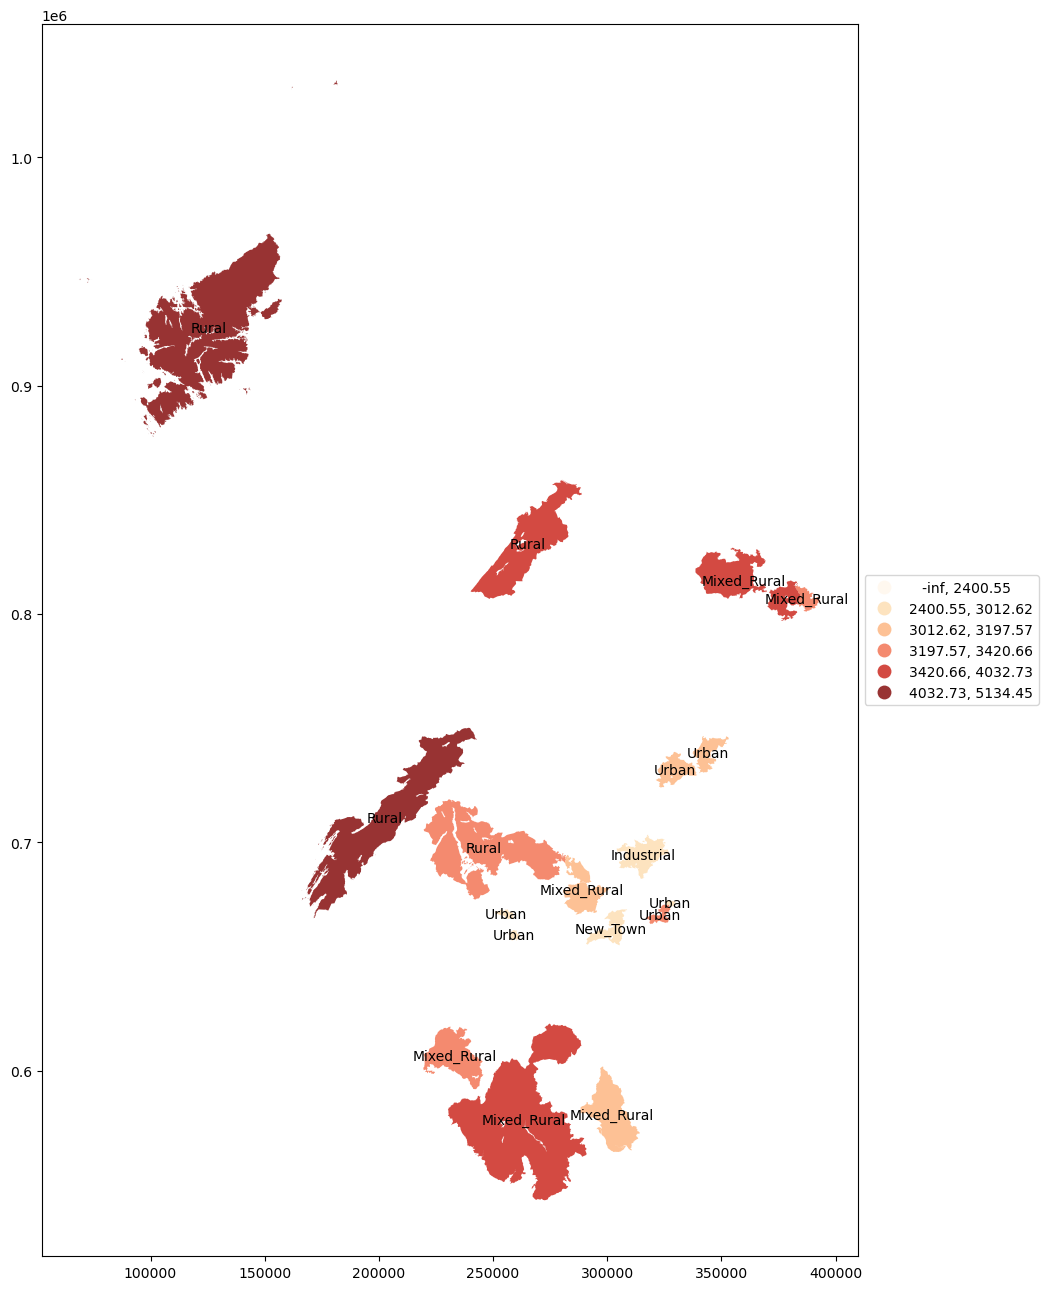

In [44]:
ax = city_electricity.plot(
    figsize = (20, 16),
    column = 'Mean_cons_kwh',
    scheme = 'Boxplot',
    cmap = 'OrRd',
    legend = True,
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'fmt': '{:.2f}'},
    alpha = 0.8
)

for index in city_electricity.index:
    x = city_electricity.iloc[index].geometry.centroid.x
    y = city_electricity.iloc[index].geometry.centroid.y
    name = city_electricity.iloc[index]['Classification']
    ax.text(x, y, name, ha = 'center', va = 'center', color = 'black')